## EJERCICIO 1

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg


acerinox = pd.read_csv("ACX Historical Data.csv", sep = ",")
acerinox['Date'] = pd.to_datetime(acerinox['Date'])

acerinox['Change %'] = acerinox['Change %'].str.rstrip('%').astype(float)
acerinox



,Date,Price,Open,High,Low,Vol.,Change %
0,2023-11-24,10.150,10.095,10.215,10.095,527.06K,-0.15
1,2023-11-23,10.165,10.115,10.180,10.095,383.34K,0.84
2,2023-11-22,10.080,10.055,10.210,9.970,874.87K,-0.20
3,2023-11-21,10.100,10.100,10.225,10.075,824.44K,-0.39
4,2023-11-20,10.140,10.085,10.150,9.980,1.06M,0.95
...,...,...,...,...,...,...,...
913,2020-05-08,6.736,6.852,6.870,6.666,424.05K,-0.50
914,2020-05-07,6.770,6.670,6.770,6.568,421.98K,1.26
915,2020-05-06,6.686,6.748,6.804,6.628,942.84K,-1.53
916,2020-05-05,6.790,6.970,7.028,6.776,514.04K,-1.16


##### APARTADO A) Calcula el porcentaje de datos utilizados en cada opción para TR y TS.

Vamos a dividir los datos en train y test con la opcion A

In [303]:
# Filtra las filas basadas en las fechas que deseas (05/04/2020 hasta 01/31/2023).

fecha_inicio = '05/04/2020'
fecha_fin = '01/31/2023'

x_trainA = acerinox[(acerinox['Date'] <= fecha_fin)]
x_testA = acerinox[(acerinox['Date'] > fecha_fin)]


In [304]:
# Calcula el porcentaje de datos en x_train con respecto al DataFrame original.
porcentaje_x_trainA = (len(x_trainA) / len(acerinox)) * 100

print(f"El porcentaje de datos en x_train es: {porcentaje_x_trainA:.2f}% y portanto el porcenteje de datos en x_test es: {100-porcentaje_x_trainA:.2f}%")

El porcentaje de datos en x_train es: 77.12% y portanto el porcenteje de datos en x_test es: 22.88%


Vamos a dividir los datos en train y test con la opcion B

In [305]:
# Filtra las filas basadas en las fechas que deseas (05/04/2020 hasta 01/31/2023).

fecha_inicio = '05/04/2020'
fecha_fin = '08/31/2023'

x_trainB = acerinox[(acerinox['Date'] <= fecha_fin)]
x_testB = acerinox[(acerinox['Date'] > fecha_fin)]

In [306]:
# Calcula el porcentaje de datos en x_train con respecto al DataFrame original.
porcentaje_x_trainB = (len(x_trainB) / len(acerinox)) * 100

print(f"El porcentaje de datos en x_train es: {porcentaje_x_trainB:.2f}% y portanto el porcenteje de datos en x_test es: {100-porcentaje_x_trainB:.2f}%")

El porcentaje de datos en x_train es: 93.36% y portanto el porcenteje de datos en x_test es: 6.64%


Vamos a dividir los datos en train y test con la opcion C

In [307]:
# Filtra las filas basadas en las fechas que deseas (05/04/2020 hasta 01/31/2023).

fecha_inicio = '05/04/2020'
fecha_fin = '08/31/2022'

x_trainC = acerinox[(acerinox['Date'] <= fecha_fin)]
x_testC = acerinox[(acerinox['Date'] > fecha_fin)]

In [308]:
# Calcula el porcentaje de datos en x_train con respecto al DataFrame original.
porcentaje_x_trainC = (len(x_trainC) / len(acerinox)) * 100

print(f"El porcentaje de datos en x_train es: {porcentaje_x_trainC:.2f}% y portanto el porcenteje de datos en x_test es: {100-porcentaje_x_trainC:.2f}%")

El porcentaje de datos en x_train es: 65.36% y portanto el porcenteje de datos en x_test es: 34.64%


##### B) Muestra gráficamente las tres opciones en un gráfico de serie temporal para el precio de cierre.

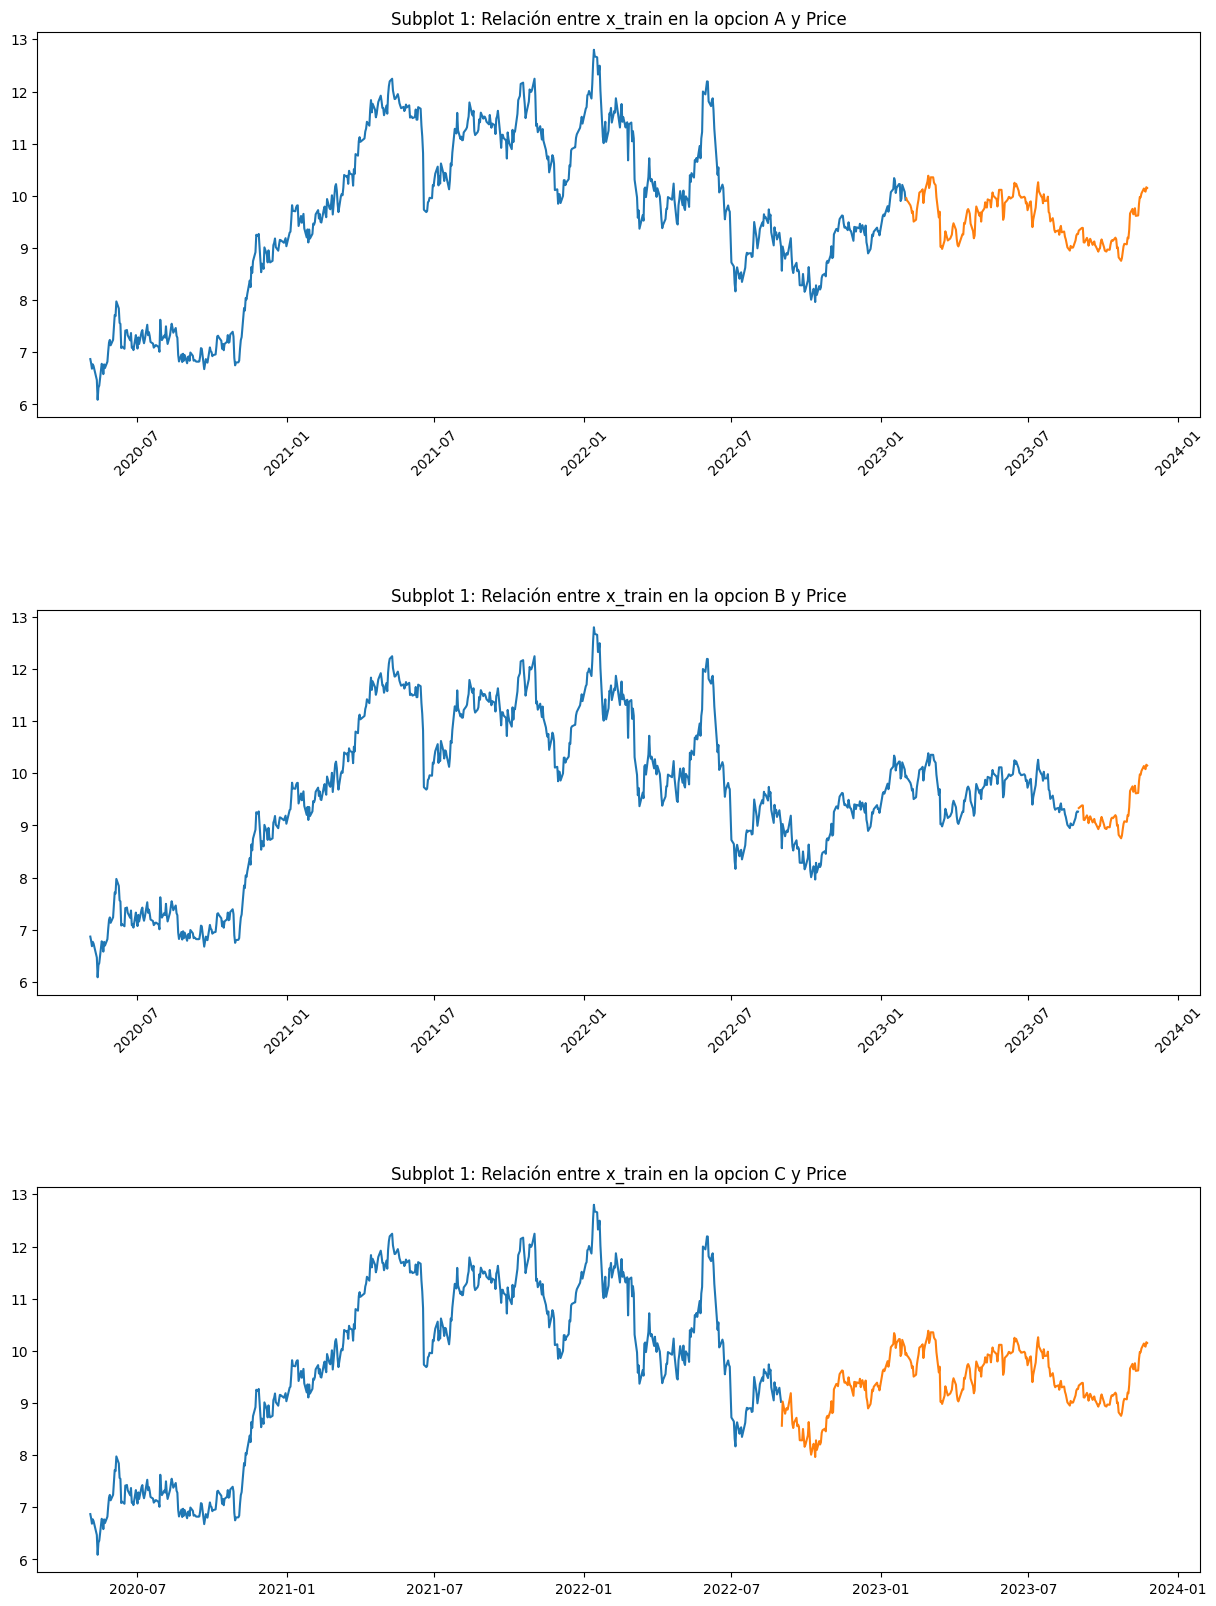

<Figure size 1500x1000 with 0 Axes>

In [309]:
# Graficar la relación entre 'Price' y 'x_train'
fig, ax = plt.subplots(3, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)


plt.figure(figsize=(15, 10))
ax[0].plot(x_trainA['Date'], x_trainA['Price'], label='Train Data')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
ax[0].set_title('Subplot 1: Relación entre x_train en la opcion A y Price')
ax[0].plot(x_testA['Date'], x_testA['Price'], label='Train Data')



ax[1].plot(x_trainB['Date'], x_trainB['Price'], label='Train Data')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
ax[1].set_title('Subplot 1: Relación entre x_train en la opcion B y Price')
ax[1].plot(x_testB['Date'], x_testB['Price'], label='Train Data')


ax[2].plot(x_trainC['Date'], x_trainC['Price'], label='Train Data')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
ax[2].set_title('Subplot 1: Relación entre x_train en la opcion C y Price')
ax[2].plot(x_testC['Date'], x_testC['Price'], label='Train Data')

plt.show()



##### C) ¿En qué opción los periodos TR y TS son más diferentes? ¿Y más semejantes? En ambos casos respecto al precio de cierre. Emplea medidas estadísticas y gráficos como el gráfico de cajas.


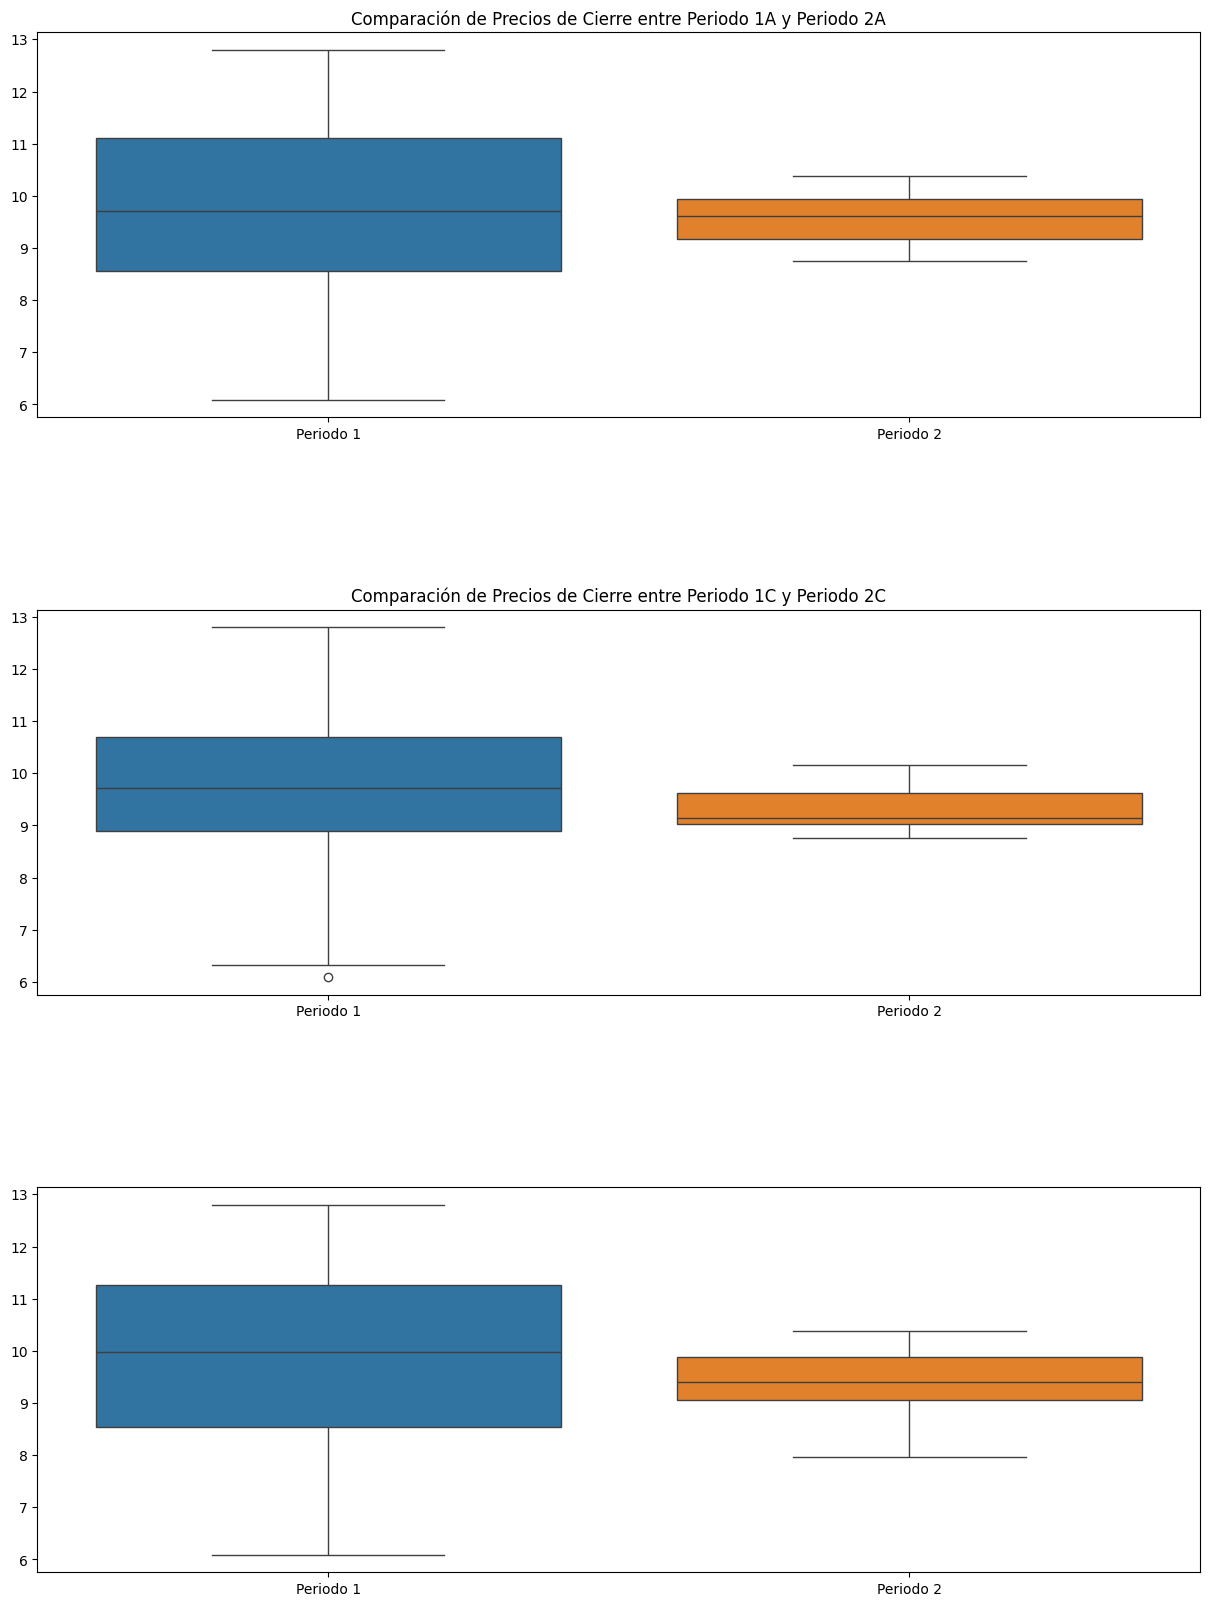

In [310]:
import seaborn as sns

fig, ax = plt.subplots(3, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosA = pd.concat([x_trainA['Price'], x_testA['Price']], axis = 1)
datos_combinadosA.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosA, ax=ax[0])
ax[0].set_title('Comparación de Precios de Cierre entre Periodo 1A y Periodo 2A')


# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosB = pd.concat([x_trainB['Price'], x_testB['Price']], axis = 1)
datos_combinadosB.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosB, ax=ax[1])
ax[1].set_title('Comparación de Precios de Cierre entre Periodo 1B y Periodo 2B')


# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosC = pd.concat([x_trainC['Price'], x_testC['Price']], axis = 1)
datos_combinadosC.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosC, ax=ax[2])
ax[1].set_title('Comparación de Precios de Cierre entre Periodo 1C y Periodo 2C')

plt.show()

Se puede ver que en las 3 la diferencia del periodo 1 al dos es que hay mucha mas variabilidad en el periodo 1. La mediana en A es muy parecida en ambos periodos, mientras que en B y C la mediana es menor en el segundo periodo. En B, los datos son muy parecidos en el segundo periodo, ya que la caja es muy achatada. A demas se puede ver como en los periodos B y C la media es muy diferente.

##### D) ¿En qué opción los periodos TR y TS son más diferentes? ¿Y más semejantes? En ambos casos respecto a la variación diaria del precio de cierre. Emplea medidas estadísticas y gráficos como el gráfico de cajas.

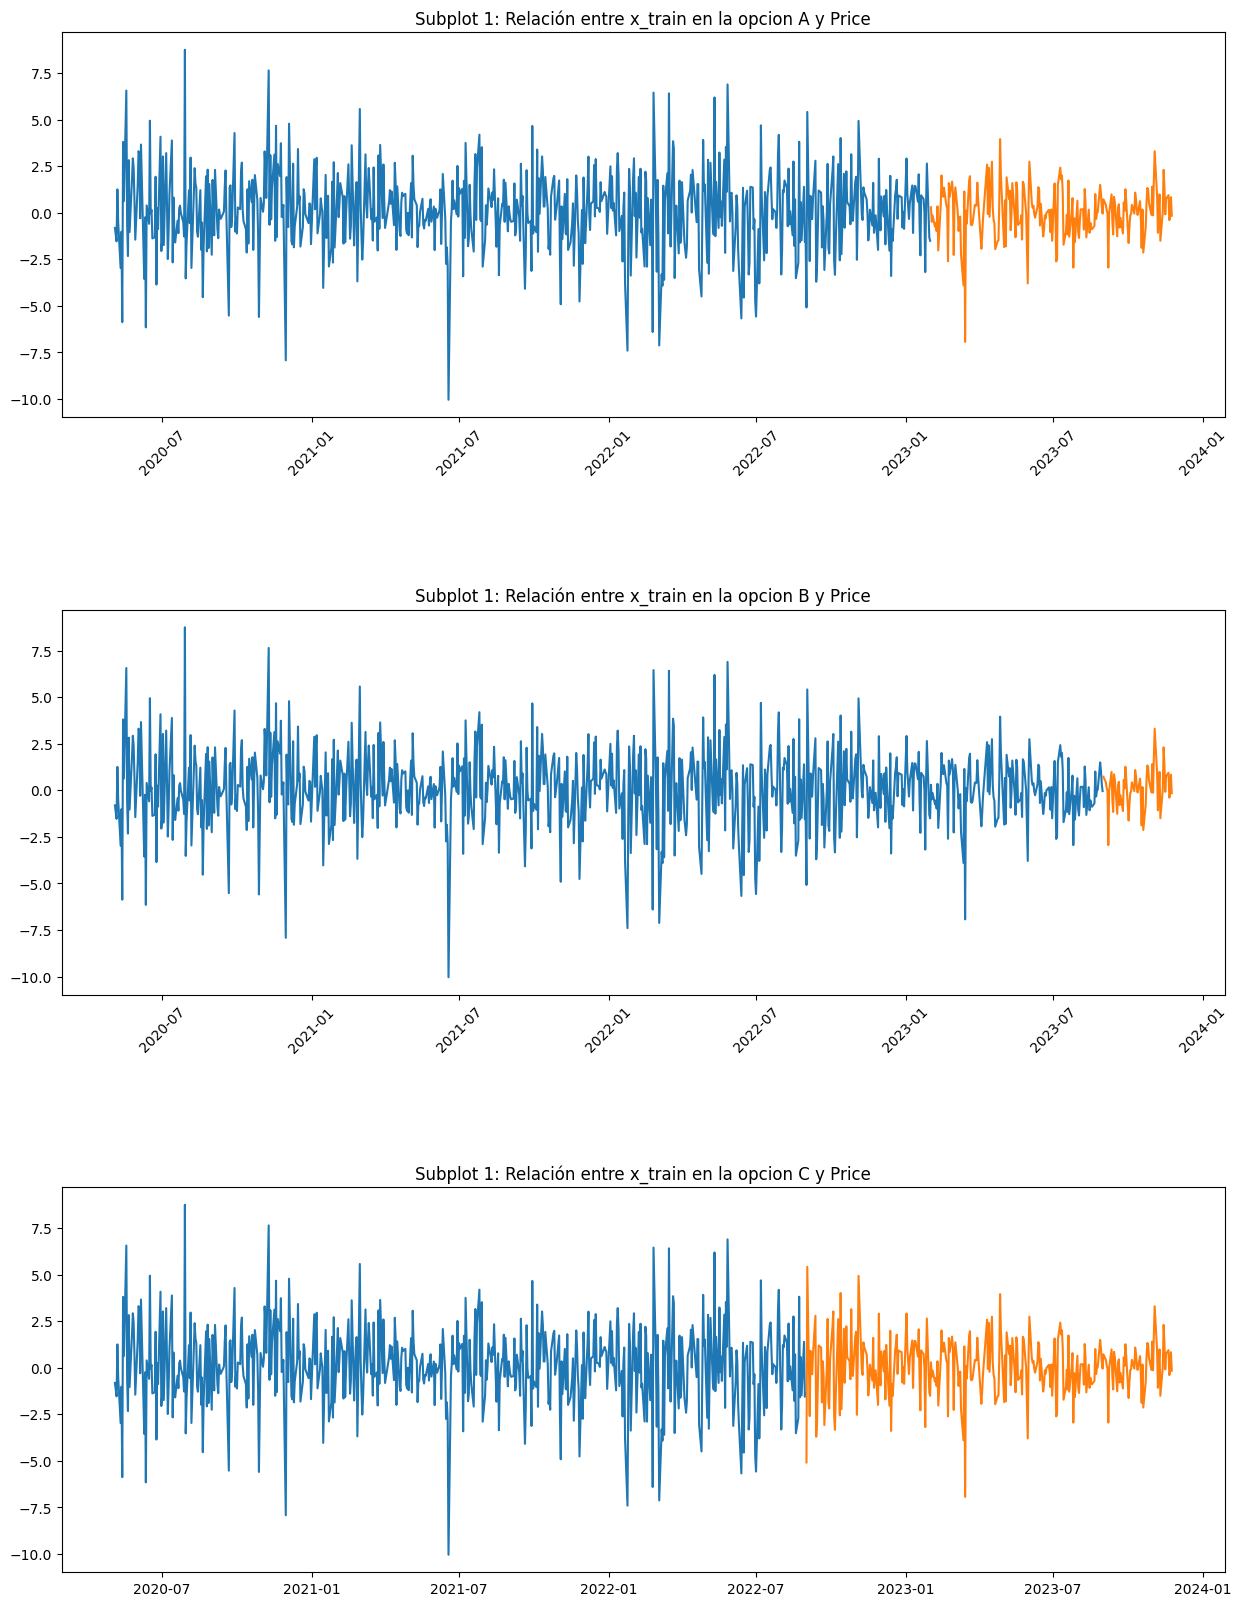

<Figure size 1500x1000 with 0 Axes>

In [311]:
# Graficar la relación entre '% var.' y 'df_train'
fig, ax = plt.subplots(3, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

plt.figure(figsize=(15, 10))
ax[0].plot(x_trainA['Date'], x_trainA['Change %'], label='Train Data')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
ax[0].set_title('Subplot 1: Relación entre x_train en la opcion A y Price')
ax[0].plot(x_testA['Date'], x_testA['Change %'], label='Train Data')

ax[1].plot(x_trainB['Date'], x_trainB['Change %'], label='Train Data')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
ax[1].set_title('Subplot 1: Relación entre x_train en la opcion B y Price')
ax[1].plot(x_testB['Date'], x_testB['Change %'], label='Train Data')

ax[2].plot(x_trainC['Date'], x_trainC['Change %'], label='Train Data')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
ax[2].set_title('Subplot 1: Relación entre x_train en la opcion C y Price')
ax[2].plot(x_testC['Date'], x_testC['Change %'], label='Train Data')


plt.show()


Se puede ver como en las 3 graficas son bastante parecidas, ya que en las 3 la varianza del test parece ser menor que la varianza del train. viendo ciertos aumentos puntuales de varianza. Vamos a verlo con el grafico de cajas.

Text(0.5, 1.0, 'Comparación de % de cambio entre Periodo 1C y Periodo 2C')

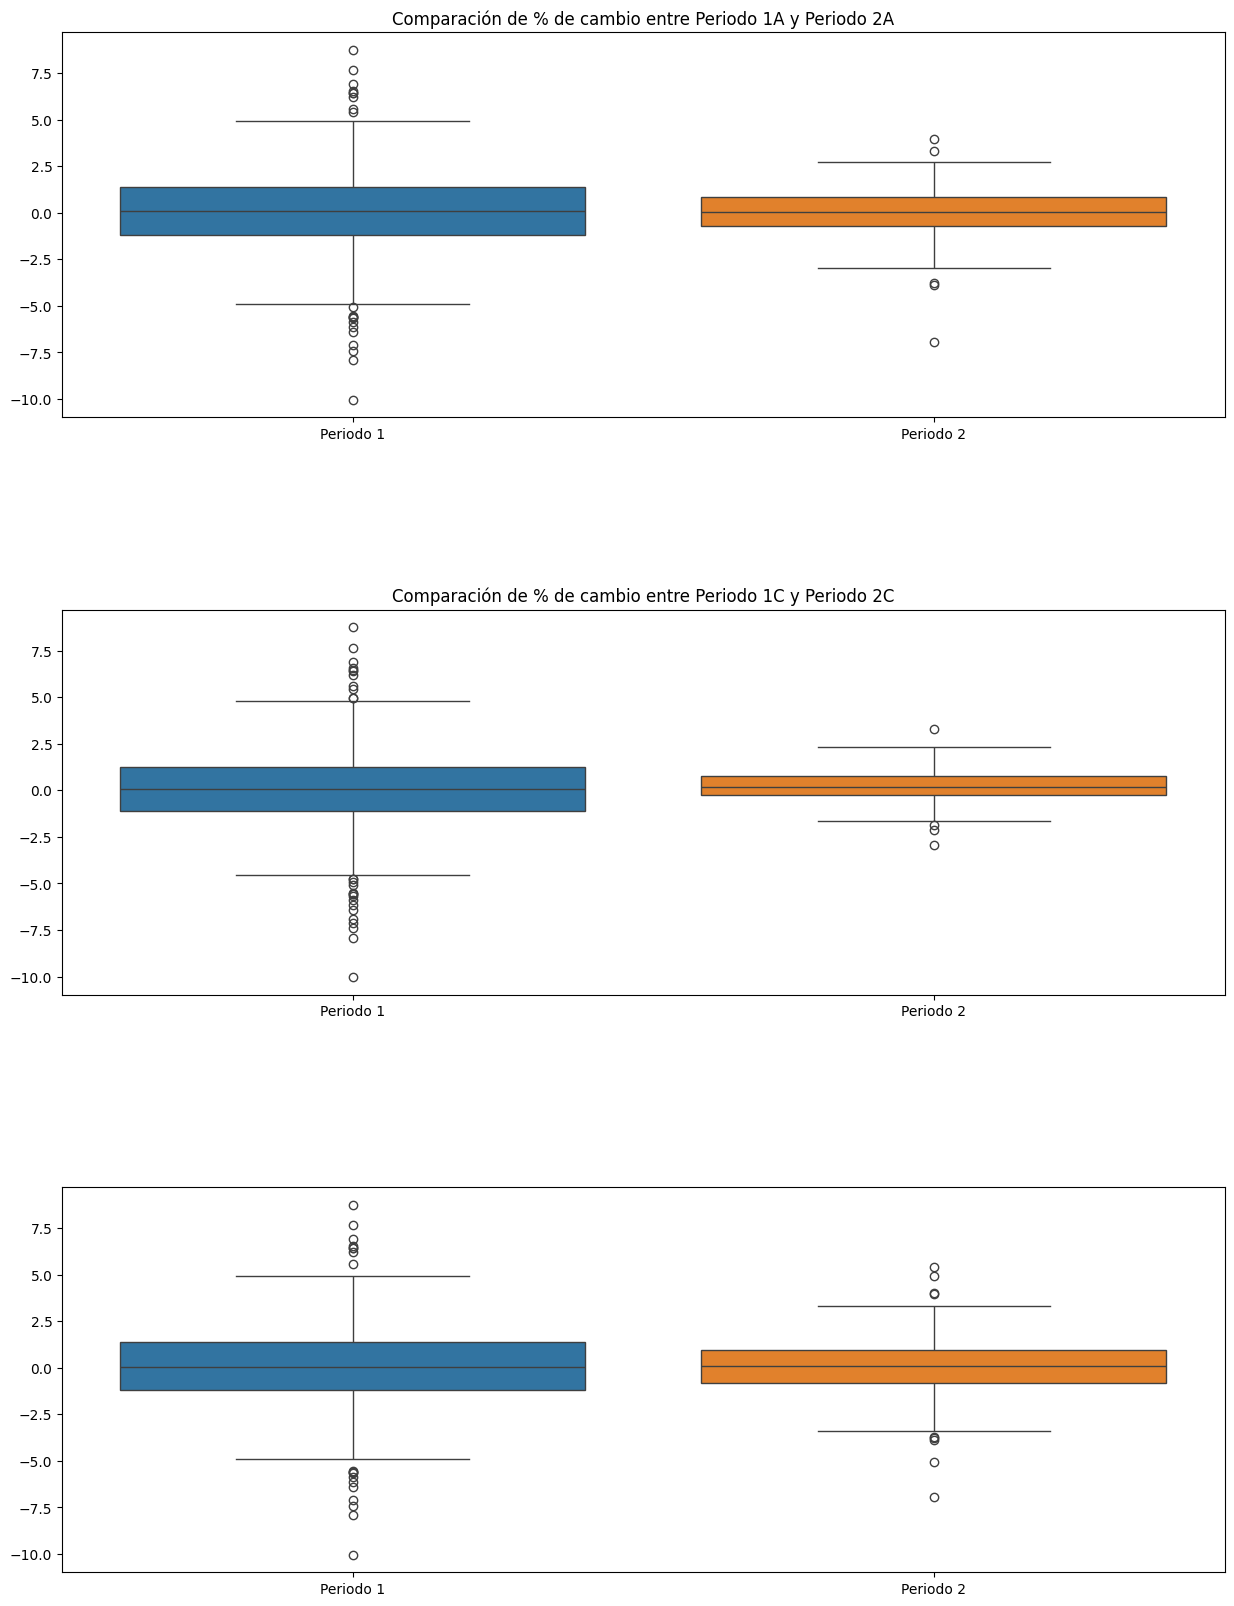

In [312]:
fig, ax = plt.subplots(3, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosA = pd.concat([x_trainA['Change %'], x_testA['Change %']], axis = 1)
datos_combinadosA.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosA, ax=ax[0])
ax[0].set_title('Comparación de % de cambio entre Periodo 1A y Periodo 2A')


# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosB = pd.concat([x_trainB['Change %'], x_testB['Change %']], axis = 1)
datos_combinadosB.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosB, ax=ax[1])
ax[1].set_title('Comparación de % de cambio entre Periodo 1B y Periodo 2B')


# Combina los datos de ambos periodos en un solo DataFrame
datos_combinadosC = pd.concat([x_trainC['Change %'], x_testC['Change %']], axis = 1)
datos_combinadosC.columns = ['Periodo 1', 'Periodo 2']

# Crea un boxplot para comparar las distribuciones
sns.boxplot(data=datos_combinadosC, ax=ax[2])
ax[1].set_title('Comparación de % de cambio entre Periodo 1C y Periodo 2C')


Viendo el grafico de cajas, se puede ver como el modelo C Parece ser en el que el periodo de train y el de test son más parecidos, ya que el cuarto 0,25 y el de 0,75, estan casi igualados. A su vez, se puede ver como ambos tienen bastantes outliers.

In [313]:
print('Modelo A')
print('Media TR %s y TS %s' % (x_trainA['Change %'].mean(), x_testA['Change %'].mean()))
print('Varianza TR: %s y TS: %s' % (x_trainA['Change %'].std(), x_testA['Change %'].std()))
print('Modelo B')
print('Media TR %s y TS %s' % (x_trainB['Change %'].mean(), x_testB['Change %'].mean()))
print('Varianza TR: %s y TS: %s' % (x_trainB['Change %'].std(), x_testB['Change %'].std()))
print('Modelo C')
print('Media TR %s y TS %s' % (x_trainC['Change %'].mean(), x_testC['Change %'].mean()))
print('Varianza TR: %s y TS: %s' % (x_trainC['Change %'].std(), x_testC['Change %'].std()))

Modelo A
Media TR 0.07388418079096046 y TS 0.019571428571428573
Varianza TR: 2.1495490196739793 y TS: 1.348593918521993
Modelo B
Media TR 0.05484247374562428 y TS 0.15442622950819676
Varianza TR: 2.0449794927718528 y TS: 1.0568625337765298
Modelo C
Media TR 0.06823333333333333 y TS 0.04867924528301886
Varianza TR: 2.2005908021907894 y TS: 1.5345927493167626


Visto de esta manera, parece ser que el modelo B parece ser el que tiene menos varianza, ya que su valor es de 2.044, en comparacion con 2.14 y 2.20. Por lo que el modelo en el que más se asemejan los datos de train y test es el C ya que hay menos diferencia entre la variabilidad de tr y ts, y la diferencia de medias. Los que más difieren es el conjunto B.

##### E) Dibuja el diagrama de dispersión con la recta de regresión ajustada para los precios de cierre con el modelo AR(1) en la opción A. Idem tomando todo el conjunto de datos como TR. Extraer conclusiones.

                            AutoReg Model Results                             
Dep. Variable:                  Price   No. Observations:                  708
Model:                     AutoReg(1)   Log Likelihood                 115.588
Method:               Conditional MLE   S.D. of innovations              0.205
Date:                Sun, 26 Nov 2023   AIC                           -225.176
Time:                        19:27:09   BIC                           -211.492
Sample:                             1   HQIC                          -219.889
                                  708                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0547      0.047      1.164      0.244      -0.037       0.147
Price.L1       0.9939      0.005    206.541      0.000       0.984       1.003
                                    Roots           

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


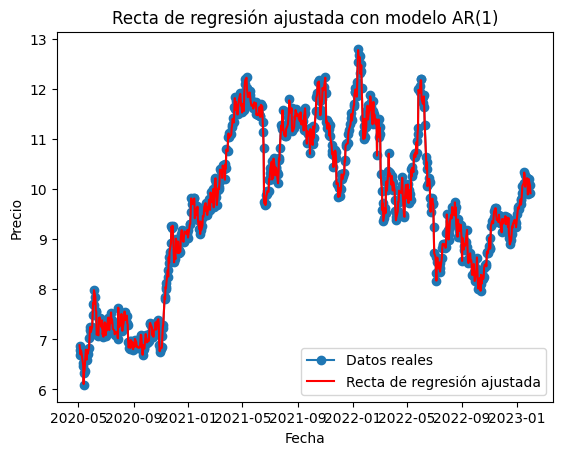

In [314]:
# Ajusta un modelo AR(1)
model = sm.tsa.AutoReg(x_trainA['Price'], lags=1)
results = model.fit()

# Imprime los resultados del modelo
print(results.summary())

# Hacer predicciones para la recta de regresión ajustada
predictions = results.predict(start=1, end=len(x_trainA['Price']))

# Graficar los datos y la recta de regresión ajustada
plt.plot(x_trainA['Date'], x_trainA['Price'], label='Datos reales', marker='o')
plt.plot(x_trainA['Date'], predictions, label='Recta de regresión ajustada', color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.title('Recta de regresión ajustada con modelo AR(1)')
plt.show()

Se puede ver como la recta de regresion del modelo AR(1) es una recta perfecta o casi perfecta, lo cual nos hace pensar que ha habido un sobreentrenamiento

                            AutoReg Model Results                             
Dep. Variable:                  Price   No. Observations:                  918
Model:                     AutoReg(1)   Log Likelihood                 218.229
Method:               Conditional MLE   S.D. of innovations              0.191
Date:                Sun, 26 Nov 2023   AIC                           -430.458
Time:                        19:27:10   BIC                           -415.994
Sample:                             1   HQIC                          -424.938
                                  918                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.043      1.490      0.136      -0.020       0.148
Price.L1       0.9930      0.004    224.566      0.000       0.984       1.002
                                    Roots           

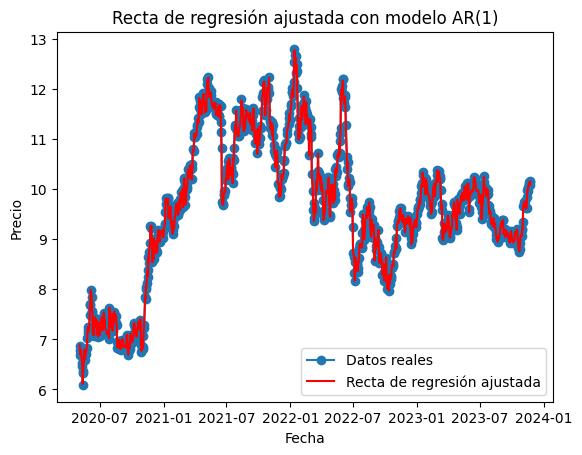

In [315]:
# Ajusta un modelo AR(1)
model = sm.tsa.AutoReg(acerinox['Price'], lags=1)
results = model.fit()

# Imprime los resultados del modelo
print(results.summary())

# Hacer predicciones para la recta de regresión ajustada
predictions = results.predict(start=1, end=len(acerinox['Price']))

# Graficar los datos y la recta de regresión ajustada
plt.plot(acerinox['Date'], acerinox['Price'], label='Datos reales', marker='o')
plt.plot(acerinox['Date'], predictions, label='Recta de regresión ajustada', color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.title('Recta de regresión ajustada con modelo AR(1)')
plt.show()

De nuevo podemos ver como el modelo esta sobreentrenado, ya qu ese puede ver que se ajusta al 100% a todos los puntos de regresion

##### F) Obtener los residuos y proceder a un análisis gráfico de los mismos en las dos hipótesis de e). Extraer conclusiones sobre el modelo AS-RLS basado en normalidad, aleatoriedad y homocedasticidad de los errores.

/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/3772856704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_trainA['Price-1'] = x_trainA['Price'].shift(1)
/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/3772856704.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.402e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:27:11   Log-Likelihood:                 86.399
No. Observations:                 560   AIC:                            -168.8
Df Residuals:                     558   BIC:                            -160.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0569      0.053      1.080      0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

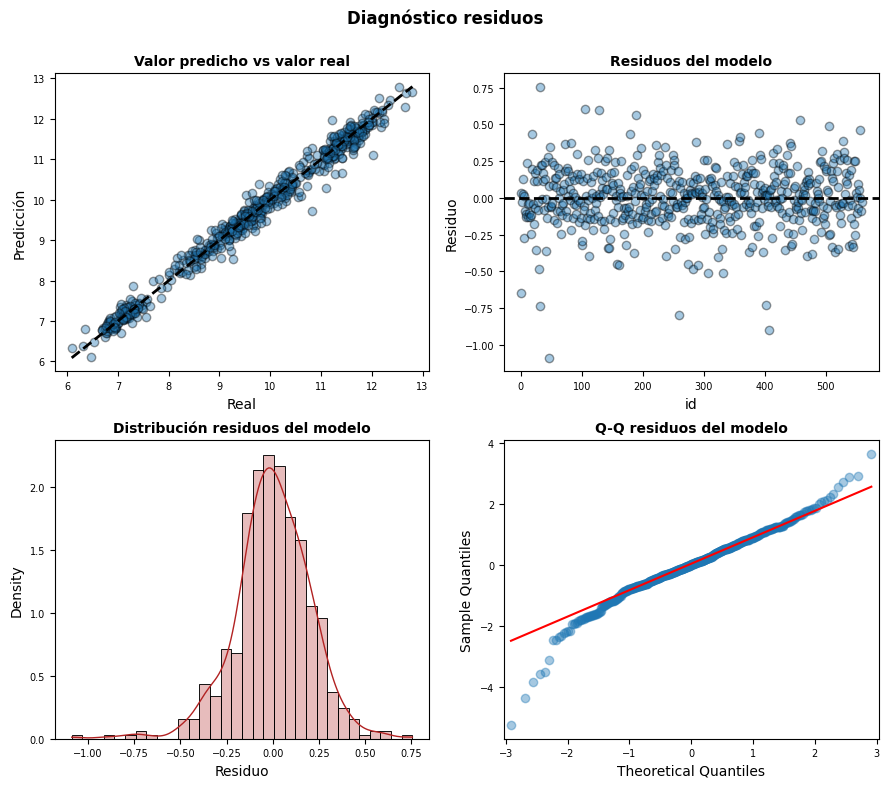

In [316]:
#PRIMER CASO
#Diagnóstico residuos de las predicciones de entrenamiento
x_trainA['Price-1'] = x_trainA['Price'].shift(1)

# Eliminar las filas con valores nulos resultantes del lag
x_trainA = x_trainA.dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(x_trainA, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión lineal con statsmodels
X_train = sm.add_constant(train_data['Price-1'])
y_train = train_data['Price']
model = sm.OLS(y_train, X_train).fit()

# Imprimir los coeficientes del modelo
print(model.summary())

# Realizar predicciones en el conjunto de prueba
X_test = sm.add_constant(test_data['Price-1'])
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(test_data['Price'], y_pred)
print(f"Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}")

prediccion_train = model.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

# Gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

Viendo la grafica de dispersion de los residuos, podemos ver como efectivamente hay una dispersion normal de ellos. Mantiene la misma variabilidad en torno al eje x, por lo que se podria decir que hay homocedasticidad. Podemos ver en los cuantiles de los residuos, como siguen una linea diagonal, por lo que se puede afirmar que hay aleatoriedad en estos.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.856e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:27:12   Log-Likelihood:                 152.11
No. Observations:                 728   AIC:                            -300.2
Df Residuals:                     726   BIC:                            -291.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.049      1.464      0.1

/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/4292050948.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()],
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

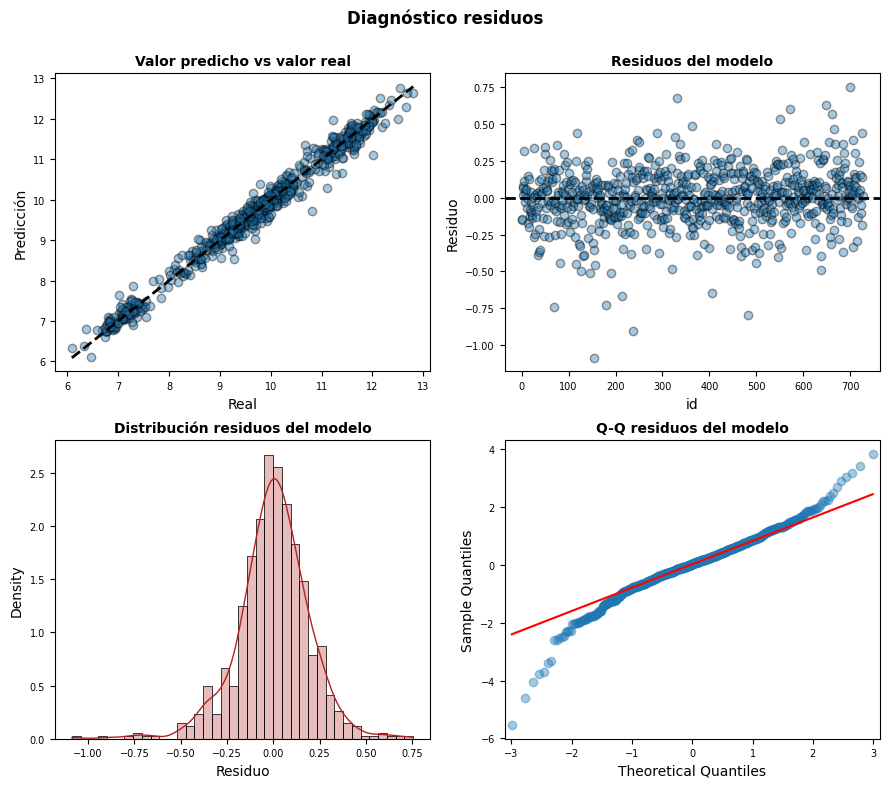

In [317]:
#CASO COMPLETO
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
acerinox['Price-1'] = acerinox['Price'].shift(1)

# Eliminar las filas con valores nulos resultantes del lag
acerinox = acerinox.dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data2, test_data2 = train_test_split(acerinox, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión lineal con statsmodels
X_train2 = sm.add_constant(train_data2['Price-1'])
y_train2 = train_data2['Price']
model2 = sm.OLS(y_train2, X_train2).fit()

# Imprimir los coeficientes del modelo
print(model2.summary())

# Realizar predicciones en el conjunto de prueba
X_test = sm.add_constant(test_data2['Price-1'])
y_pred = model2.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(test_data2['Price'], y_pred)
print(f"Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}")

prediccion_train = model2.predict(exog = X_train2)
residuos_train   = prediccion_train - y_train2

# Gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train2, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train2))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)



fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

Se puede apreciar que en este caso los residios tienen un comportamiento bastante parecido al caso anterior, por lo que afirmamos que siguen una distribucion normal, homocedasticidad y aleatoriedad

##### G) Comparar el MSE y R cuadrado en TR y TS en la opción A.

In [318]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
x_testA['Price-1'] = x_testA['Price'].shift(1)

# Eliminar las filas con valores nulos resultantes del lag
x_testA = x_testA.dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(x_testA, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión lineal con statsmodels
X_train = sm.add_constant(train_data['Price-1'])
y_train = train_data['Price']
modeltest = sm.OLS(y_train, X_train).fit()

# Realizar predicciones en el conjunto de prueba
X_test = sm.add_constant(test_data['Price-1'])
y_pred = modeltest.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(test_data['Price'], y_pred)
print(f"Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}")

# Imprimir los coeficientes del modelo
print(modeltest.summary())

Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.03235146182526446
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     2180.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.22e-96
Time:                        19:27:14   Log-Likelihood:                 127.93
No. Observations:                 166   AIC:                            -251.9
Df Residuals:                     164   BIC:                            -245.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/1187130170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_testA['Price-1'] = x_testA['Price'].shift(1)


Como podemos ver en el apartado F)  el MSE en el r-cuadrado 0.983 y el TR es 0.042 fijandonos en las tablas generadas antes de los gráficos. En el TS, podemos ver que el r-squared es 0,897 y el MSE 0.013

Por lo que se afirma que el modelo de train es mucho más preciso que el del test, lo cual tiene sentido ya que tenemos muchos más datos

##### H) ¿Qué información se puede obtener sobre la predicción del precio de cierre del lunes 26 de Noviembre a un 95 %?


In [319]:
#Para facilitar este cálculo volvemos a leer el csv convirtiendo la columna 'Fecha' en índice
acerinox['Date'] = pd.to_datetime(acerinox['Date'], format='%d/%m/%Y')

df_pred = pd.read_csv('ACX Historical Data.csv', index_col='Date', date_format='%d/%m/%Y', decimal=',')
df_pred.index = pd.to_datetime(df_pred.index)

df_pred.sort_values(by='Date', inplace=True)
df_pred = df_pred.asfreq(freq='B', method='ffill')

df_pred['Price'] = pd.to_numeric(df_pred['Price'], errors='coerce')
df_pred = df_pred.dropna(subset=['Price'])

modelo_ar = AutoReg(df_pred['Price'], lags=1, old_names=False).fit()

prediccion_modelo = modelo_ar.get_prediction(start=len(df_pred['Price']), end=len(df_pred['Price']) + 1 - 1)

print("La prediccion del modelo para el dia Lunes 27 de noviembre será de:\n")
print(prediccion_modelo.predicted_mean)
print("\nCon intervalo de confianza de:\n")

print(prediccion_modelo.conf_int(alpha=0.05))


/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/471204369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acerinox['Date'] = pd.to_datetime(acerinox['Date'], format='%d/%m/%Y')


La prediccion del modelo para el dia Lunes 27 de noviembre será de:

2023-11-27    10.147829
Freq: B, Name: predicted_mean, dtype: float64

Con intervalo de confianza de:

               lower      upper
2023-11-27  9.777155  10.518503


Se puede ver que el precio para el dia 27-11-2023 va a ser 10.147 con posible variacion de 9.777 a 10.518

## EJERCICIO 2

##### a) Dibuja el gráfico matricial del precio de cierre de un día con el día anterior, dos días atrás,....y hasta 10 días atrás. Calcula la matriz de correlaciones.

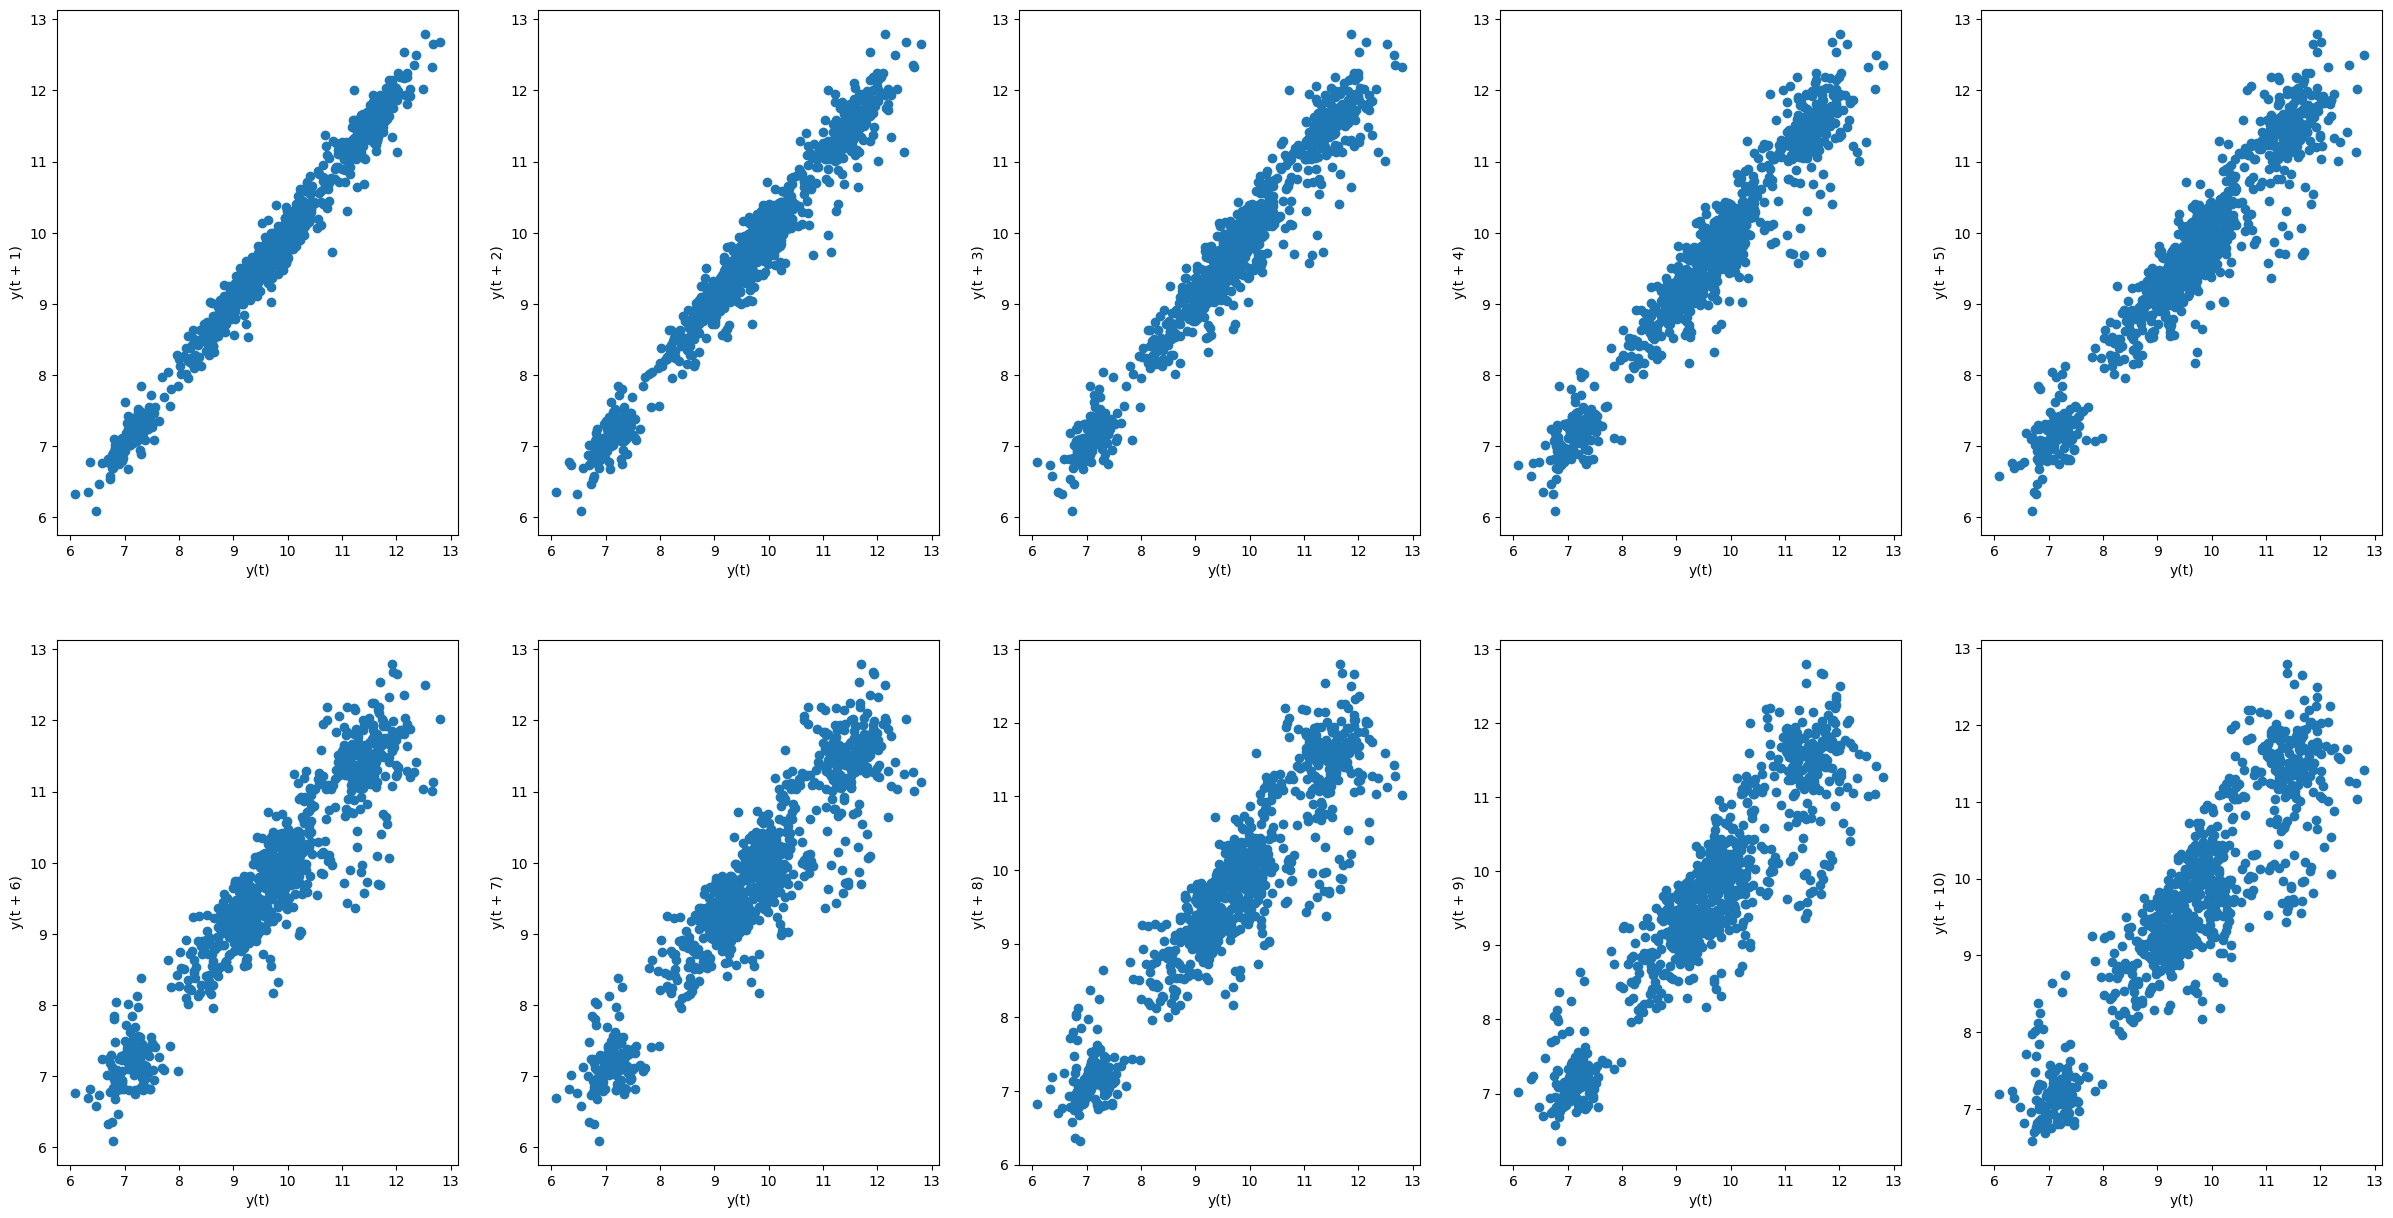

In [320]:
from pandas.plotting import lag_plot
plt.figure(figsize=(30,15))
for i in range(10):
    plt.subplot(2,5,i+1)
    lag_plot(df_pred['Price'], lag=i+1)

Se aprecia que cuanto más nos alejamos de los puntos de cierre, mas varía el precio, ya que los puntos son mas dispersos. Se ve como está mucho mas relacionada linealmente con el precio del dia anterior que con el ultimo calculado.

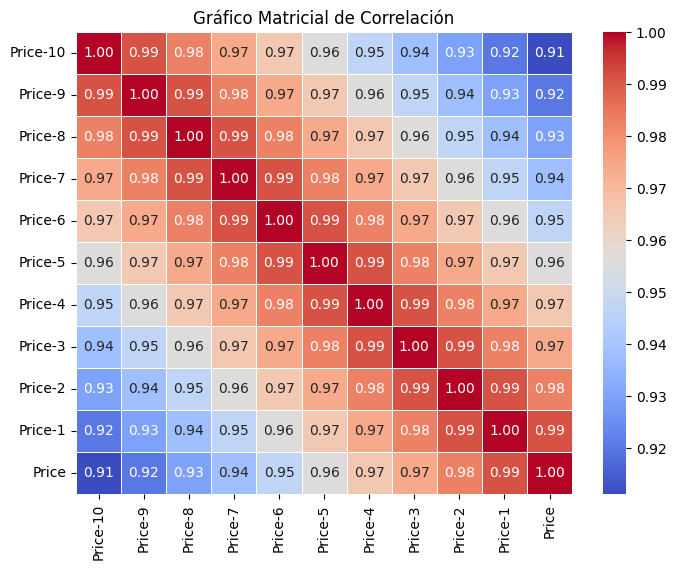

In [321]:
df_pred['Price-1'] = df_pred['Price'].shift(1)
df_pred['Price-2'] = df_pred['Price'].shift(2)
df_pred['Price-3'] = df_pred['Price'].shift(3)
df_pred['Price-4'] = df_pred['Price'].shift(4)
df_pred['Price-5'] = df_pred['Price'].shift(5)
df_pred['Price-6'] = df_pred['Price'].shift(6)
df_pred['Price-7'] = df_pred['Price'].shift(7)
df_pred['Price-8'] = df_pred['Price'].shift(8)
df_pred['Price-9'] = df_pred['Price'].shift(9)
df_pred['Price-10'] = df_pred['Price'].shift(10)

# Calcular la matriz de correlación
matriz_correlacion = df_pred[['Price-10','Price-9','Price-8','Price-7', 'Price-6','Price-5','Price-4','Price-3','Price-2','Price-1', 'Price']].corr()

# Imprimir la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Gráfico Matricial de Correlación')
plt.show()


Podemos ver que cuando más lejano es el dia al actual, menor correlacion hay. También se ve cómo los dias tambien están altamente correlacionados con su dia anterior y con su dia siguiente

##### B) Para responder al apartado anterior se utilizan los gráficos de autocorrelación y autocorrelación parcial. Obtenerlos para el precio de cierre. Como ayuda ver el video

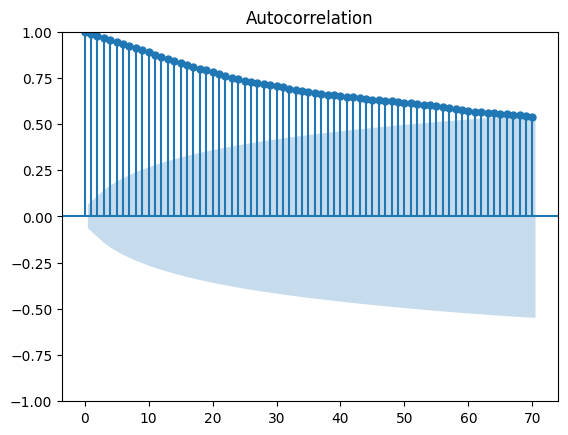

In [322]:
acf_plot = plot_acf(df_pred['Price'],lags=70)

Podemos ver como el modelo autoregresivo es descendiente, llegando a cero en un fitiro sabiendo esto, podemos confirmar como estamos tratando con un proceso auto regresivo. A partir del lag 65, podemos ver como ya los errores no son significantes. 

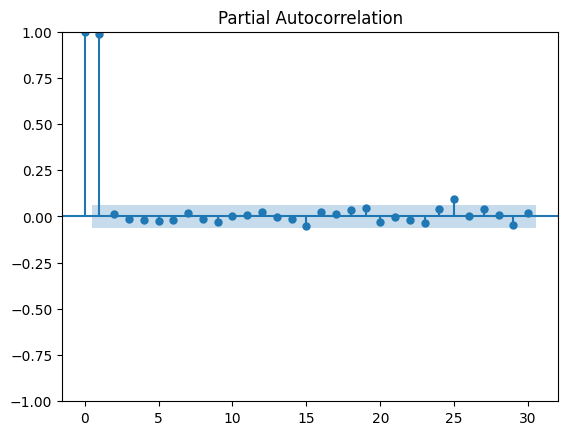

In [323]:
pacf_plot = plot_pacf(df_pred['Price'])

Gracias a la gráfica anterior observamos que a partir de lag=1, 2 la autocorrelación se mantiene, por lo que será el lag que utilizaremos. Para empezar con nuestro analisis de series temporales

##### C) Calcula de manera razonada el modelo AS-RLM del precio diario de cierre en función de los precios de cierre en los días anteriores. Es decir, el orden del modelo AR y la ecuación del modelo AR.

In [324]:
# Eliminar filas con NaN o infinitos
df_pred = df_pred.dropna()
df_pred = df_pred.replace([np.inf, -np.inf], np.nan).dropna()


# Variables predictoras (días anteriores) y variable respuesta (día actual)
X = df_pred[['Price-1', 'Price-2']]
y = df_pred['Price']
# Ajustar el modelo AR(2) en mínimos cuadrados robustos (RLM)
modelo_ar_rlm = sm.RLM(y, sm.add_constant(X)).fit()

# Imprimir los resultados
print(modelo_ar_rlm.summary())
print(X)
print('ajndcioawcionqocnweiocw')
print(y)

                    Robust linear Model Regression Results                    
Dep. Variable:                  Price   No. Observations:                  913
Model:                            RLM   Df Residuals:                      910
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 26 Nov 2023                                         
Time:                        19:27:18                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0776      0.039      1.977      0.0

Podemos observar como el modelo AR tiene orden 2 y la ecuacion Price = 0.0782 + 0.9444×Price−1 ​+ εt​

##### D) Comparar lo anterior con las indicaciones de la web https://dataaspirant.com/stepwise-regression/ para proporcionar el modelo AS-RLM con selección de variables autorregresivas que utilizarías en el futuro. Interpreta dicho modelo

La selección de variables autorregresivas en un modelo Autorregresivo con mínimos cuadrados robustos (AS-RLM) implica elegir cuántos y cuáles períodos anteriores (lags) deben incluirse en el modelo. 

En este caso estamos haciendo un análisis previo que nos permite saber el número de días hacia atrás que tenemos que mirar para poder estimar mejor el modelo. En nuestro caso hemos visto que el número es 2. Ya que ese dato fue observado en la grafica de autocorrelacion parcial.

##### E) ¿Qué información se puede obtener sobre la predicción del precio de cierre del lunes 27 de Noviembre a un 95 % según la un modelo AS-RLM de tipo autoregresión o modelo AR?

In [325]:
df_pred = pd.read_csv('ACX Historical Data.csv', index_col='Date', date_format='%d/%m/%Y', decimal=',')
df_pred.index = pd.to_datetime(df_pred.index)

df_pred.sort_values(by='Date', inplace=True)
df_pred = df_pred.asfreq(freq='B', method='ffill')

df_pred['Price'] = pd.to_numeric(df_pred['Price'], errors='coerce')
df_pred = df_pred.dropna(subset=['Price'])

#Ponemos los lags a 2 como comentado anteriormente
modelo_ar = AutoReg(df_pred['Price'], lags=2, old_names=False).fit()

prediccion_modelo = modelo_ar.get_prediction(start=len(df_pred['Price']), end=len(df_pred['Price']) + 1 - 1)

print("La prediccion del modelo para el dia Lunes 27 de noviembre será de:\n")
print(prediccion_modelo.predicted_mean)
print("\nCon intervalo de confianza de:\n")

print(prediccion_modelo.conf_int(alpha=0.05))

La prediccion del modelo para el dia Lunes 27 de noviembre será de:

2023-11-27    10.148454
Freq: B, Name: predicted_mean, dtype: float64

Con intervalo de confianza de:

               lower      upper
2023-11-27  9.777784  10.519124


Con esta información podemos afirmar que la predicción para precio de cierre dentro de un dia con una confianza de un 95% será de 10.148. Al igual que en el caso anterior es un valor muy cercano a los días anteriores. Además el valor hayado es ligeramente mayor que el del ejercicio uno con un modelo autoregresivo de orden 1.

## EJERCICIO 3

##### A) Adjuntar los gráficos y salidas correspondientes para tomar la decisión anterior

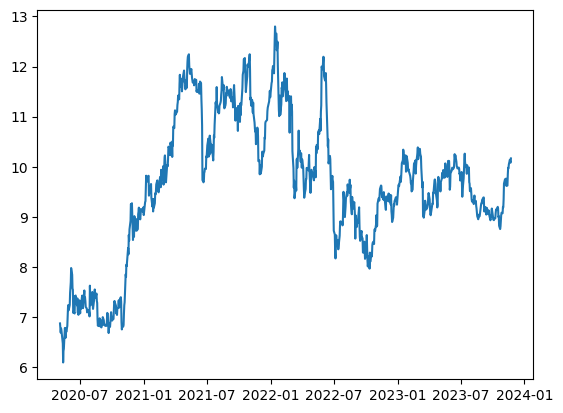

In [326]:
plt.plot(acerinox['Date'], acerinox['Price'])

Vamos a comenzar haciendo un modelo, al cual vamos a pasarle diferentes grados del polinomio, para ver para cual el error va a ser menor. Una vez visto eso, vamos a realizar las predicciones con el mejor grado del polinomio

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Agregar una columna con los días desde el inicio (para usarlo como variable independiente)
acerinox['DiasDesdeInicio'] = (acerinox['Date'] - acerinox['Date'].min()).dt.days
# Ajustar una regresión polinómica
X = acerinox['DiasDesdeInicio'].values.reshape(-1, 1)
y = acerinox['Price'].values

# Grado del polinomio
grado_polinomio = 7
polynomial_features = PolynomialFeatures(degree=grado_polinomio)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predicciones del modelo
y_pred = model.predict(X_poly)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE): {mse}')


Error Cuadrático Medio (MSE): 0.37985763742068174


/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/275971326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acerinox['DiasDesdeInicio'] = (acerinox['Date'] - acerinox['Date'].min()).dt.days


##### B) ¿Qué información se puede obtener sobre la predicción del precio de cierre del lunes 13 de Noviembre a un 95 % según la regresión polinómica?

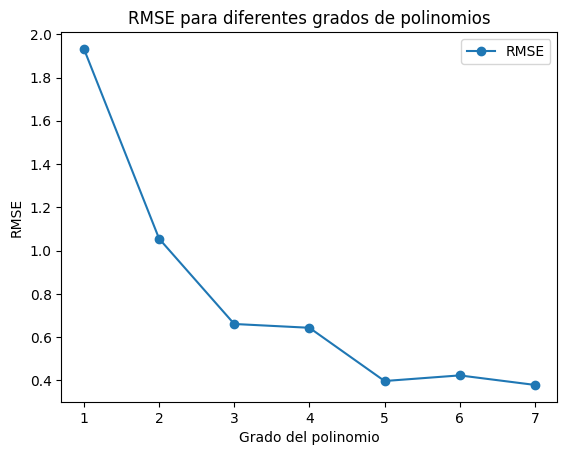

In [328]:
error_grados_polinomio = [1.9320991528007003, 1.0550956702778174, 0.6608275865910438, 0.6433104379718286, 0.3972399377937564, 0.423226542757615, 0.37921085060987986]
grados = [1, 2, 3, 4, 5, 6, 7]
# Visualizar los resultados
plt.plot(grados, error_grados_polinomio, label='RMSE', marker='o')
plt.title('RMSE para diferentes grados de polinomios')
plt.xlabel('Grado del polinomio')
plt.ylabel('RMSE')
plt.legend()
plt.show()

##### B)¿Qué información se puede obtener sobre la predicción del precio de cierre del lunes 13 de Noviembre a un 95 % según la regresión polinómica?


Viendo los grados del polinomio y el error producido al aplicar estos, podemos concluir que el grado con menor error antes del sobreaprendizaje es el 5

Predicción del precio de cierre para el lunes 27 de noviembre: 8.617882689563556
Intervalo de confianza al 95%: (-1.2302984158310353, 1.3342687933258404)


/var/folders/8r/x23htyps0gl4k_ph910q_xfh0000gn/T/ipykernel_26977/3440328085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acerinox['DiasDesdeInicio'] = (acerinox['Date'] - acerinox['Date'].min()).dt.days


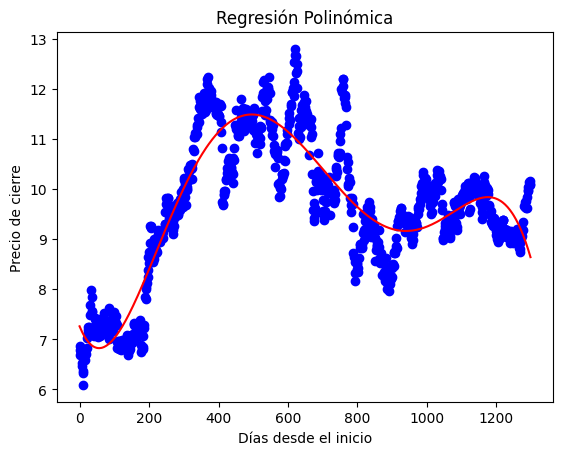

In [329]:
from sklearn.preprocessing import PolynomialFeatures

# Agregar una columna con los días desde el inicio (para usarlo como variable independiente)
acerinox['DiasDesdeInicio'] = (acerinox['Date'] - acerinox['Date'].min()).dt.days

# Ajustar una regresión polinómica
X = acerinox['DiasDesdeInicio'].values.reshape(-1, 1)
y = acerinox['Price'].values

# Grado del polinomio
grado_polinomio = 5
polynomial_features = PolynomialFeatures(degree=grado_polinomio)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predecir el precio de cierre para el lunes 13 de noviembre
dias_desde_inicio_lunes_27 = 1299
prediccion_lunes_27 = model.predict(polynomial_features.transform(np.array([[dias_desde_inicio_lunes_27]])))

# Intervalo de confianza al 95%
intervalo_confianza = np.percentile(y - model.predict(X_poly), [2.5, 97.5])

# Imprimir resultados
print(f'Predicción del precio de cierre para el lunes 27 de noviembre: {prediccion_lunes_27[0]}')
print(f'Intervalo de confianza al 95%: ({intervalo_confianza[0]}, {intervalo_confianza[1]})')

# Visualizar la regresión polinómica
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Regresión Polinómica')
plt.xlabel('Días desde el inicio')
plt.ylabel('Precio de cierre') 
plt.show()

Para un grado de polinomio 8 obtenemos una predicción al 95% para el lunes 27 de noviembre de 8.6178. Al ver la grafica, podemos observar como al final la linea de regresion baja, cuando los ultimos datos están subiendo. Esto puede ser debido a que a partir del grado 5 del polinomio hay overfitting, y por tanto el modelo no puede ajustarse mucho a la grafica.

Se piensa que habrá una prediccion mejor del modelo AR(1)